In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
import warnings
from scipy.integrate import odeint
import torch
from mlp import MLP
from experiment import *
from data import *
plt.rcParams["figure.figsize"] = [16,9]
# https://journals.aps.org/pre/pdf/10.1103/PhysRevE.54.3545
# some function structures based on https://github.com/erikdao/mlp-timeseries/blob/master/data.py
#warnings.filterwarnings('ignore')

Global seed set to 42


In [2]:
def pendulum(stateIn, t, beta, gamma, wD, w0):
        """
        pendulum state equation
        """
        w, theta = stateIn
        stateOut = np.array([-2*beta*w - w0**2*np.sin(theta) + gamma*w0**2*np.cos(wD*t), w])
        return stateOut
    
def run_pendulum(tmax=10, nt=500, beta=3*np.pi/4, gamma=1.01, wD=2*np.pi, w0=3*np.pi, wInit=0, thetaInit=0):
    t=np.linspace(0,tmax,nt)
    f = odeint(pendulum, (wInit, thetaInit), t, args=(beta, gamma, wD, w0))
    _, theta=f.T
    return t,theta


def generate_dataset(nData=3000, tmax=10, nt=500):
    print("here")
    # create randomly perturbed initial conditions wInit, thetaInit
    wInitMu, wInitSigma = 0, 0.5
    wInitRnd=np.random.normal(wInitMu, wInitSigma, nData)
    thetaInitMu, thetaInitSigma = 0, 1
    thetaInitRnd=np.random.normal(thetaInitMu, thetaInitSigma, nData)

    # create randomly perturbed values for parameters beta, gamma, wD, w0
    betaMu, betaSigma = 3*np.pi/4, 0.1
    betaRnd=np.random.normal(betaMu, betaSigma, nData)
    gammaMu, gammaSigma = 1.5, 0.03
    gammaRnd=np.random.normal(gammaMu, gammaSigma, nData)
    wDMu, wDSigma = 2*np.pi, 0.1
    wDRnd=np.random.normal(wDMu, wDSigma, nData)
    w0Mu, w0Sigma = 3*np.pi, 0.1
    w0Rnd=np.random.normal(w0Mu, w0Sigma, nData)


    # create dataset with nData "points" (each point is a time series of length nt)
    dataset=np.empty([nData, nt])
    params=np.empty([nData, 2])

    # first dataset: fixed parameters, random ICs
    for i in range(nData):
        _, theta =run_pendulum(tmax, nt, betaMu, gammaMu, wDMu, w0Mu, wInitRnd[i], thetaInitRnd[i])
        dataset[i]=theta
    params=np.array([wInitRnd,thetaInitRnd]).T
    return dataset, params

In [57]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = create_dataset()

In [11]:
model = MLP()


TypeError: 'NoneType' object is not iterable

In [31]:
dataset=np.empty([5, 10])

In [23]:
grid_search_network()

NameError: name 'create_pytorch_data' is not defined

In [3]:
d,p=generate_dataset()

here


In [4]:
tmax, nt = 10, 500
t=np.linspace(0,tmax,nt)

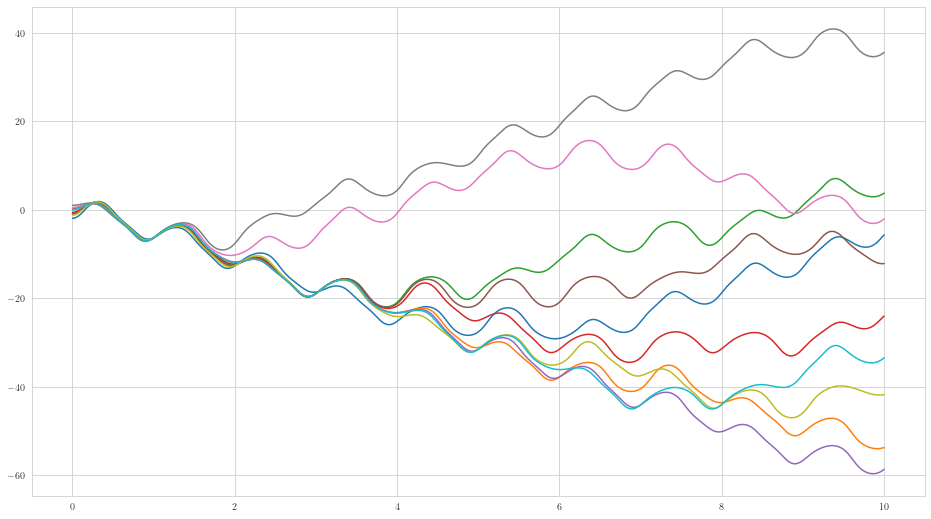

In [6]:
nDataPoints=d.shape[0]
k=10
plt.figure()
for i in range(10):
    plt.plot(t,d[i*int(nDataPoints/k),:])
    #plt.plot(t,d[i,:])

plt.show()


# if I choose a different value of gamma, will the varying ICs result in a wider variety of behaviors? 
# I think because of my forcing amplitude gamma I am getting caught in this attractor no matter what ICs I use